In [51]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

import matplotlib
%matplotlib inline

In [52]:
df_ks = pd.read_csv("ks_projects.csv")

df_ks.head(10)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [53]:
cat_count = df_ks.category.value_counts() 
top_cat = cat_count[cat_count >=1000]

# print (top_cat)

top_cat.head(10)

#just curious to know what are the top categories

Product Design    22314
Documentary       16139
Music             15727
Tabletop Games    14180
Shorts            12357
Video Games       11830
Food              11493
Film & Video      10108
Fiction            9169
Fashion            8554
Name: category, dtype: int64

In [54]:
top_cat.tail(10)

Wearables         1233
DIY               1173
Woodworking       1167
Farms             1154
People            1103
Faith             1092
Live Games        1050
Conceptual Art    1030
Television        1015
Performances      1013
Name: category, dtype: int64

In [55]:
df_ks.groupby("main_category").nunique()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
main_category,,,,,,,,,,,,,,,
Art,28153,28082,13,1,14,2946,1564,28150,8077,5,654,22,10663,11620,6653
Comics,10819,10800,6,1,13,2575,795,10817,5945,5,920,21,6375,6996,2515
Crafts,8809,8786,15,1,13,2049,596,8808,2494,5,363,20,3247,3678,2551
Dance,3768,3764,5,1,13,1961,360,3768,2306,6,246,21,2385,2566,850
Design,30070,29982,7,1,14,2668,1459,30059,14369,6,2052,23,17184,18805,8476
Fashion,22816,22788,9,1,14,2621,1042,22815,7187,6,848,23,9333,10361,6322
Film & Video,63585,62960,20,1,14,3074,2747,63573,17780,6,1237,23,22483,24167,11533
Food,24602,24484,13,1,13,2665,1359,24598,7929,5,736,22,9367,10312,5408
Games,35231,35029,8,1,14,2694,1563,35219,15248,6,2499,23,19326,21047,10210


In [56]:
df_ks.groupby("category").nunique()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
category,,,,,,,,,,,,,,,
3D Printing,683,683,1,1,13,540,145,683,580,6,244,22,579,605,380
Academic,916,915,1,1,13,632,184,916,423,5,129,21,449,521,431
Accessories,3165,3161,1,1,14,1196,333,3165,1927,6,379,23,2011,2329,1391
Action,740,739,1,1,10,545,174,740,341,5,109,17,362,408,351
Animals,255,255,1,1,9,213,89,255,148,5,66,15,171,187,162
Animation,2541,2535,1,1,12,1587,382,2541,1433,5,369,19,1513,1591,835
Anthologies,784,782,1,2,11,583,196,784,697,5,371,18,662,722,364
Apparel,7166,7159,1,1,14,1354,510,7165,2567,5,458,23,2966,3363,2252
Apps,6345,6326,1,1,14,1342,506,6344,1594,5,267,22,2297,2681,2647


In [57]:
df_ks = df_ks.drop("usd pledged", axis =1)

# usd pledged is similar to usd_pledged_real (or very subtle differences)

In [58]:
df_ks = df_ks.drop("ID", axis =1)

#ID cols is useless

In [59]:
df_ks = df_ks.drop("goal", axis =1)

#this is the same as usd_goal_real

In [60]:
df_ks = df_ks.drop("pledged", axis =1)

#this is the same as usd_pledged_real

In [61]:
df_ks.head()

,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00


In [62]:
df_ks.isnull().sum()

#checking null

name                4
category            0
main_category       0
currency            0
deadline            0
launched            0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [63]:
df_ks[df_ks.name.isnull()]

,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
166851,NaN,Narrative Film,Film & Video,USD,2012-02-29,2012-01-01 12:35:31,failed,1,US,100.00,200000.00
307234,NaN,Video Games,Games,GBP,2013-01-06,2012-12-19 23:57:48,failed,12,GB,316.05,3224.97
309991,NaN,Product Design,Design,USD,2016-07-18,2016-06-18 05:01:47,suspended,0,US,0.00,2500.00
338931,NaN,Painting,Art,USD,2011-12-05,2011-11-06 23:55:55,failed,5,US,220.00,35000.00


In [64]:
df_ks = df_ks.dropna()

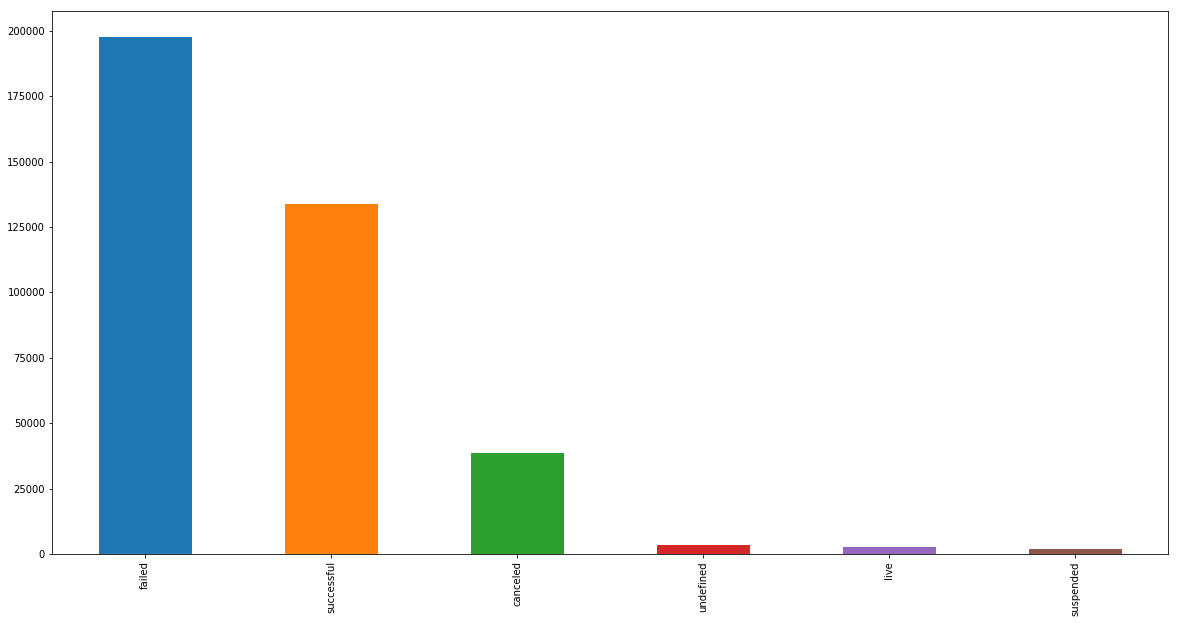

In [66]:
df_ks.state.value_counts().plot(figsize=(20,10), kind ="bar")

In [67]:
df_ks["state"] = df_ks["state"].replace(["canceled","undefined","suspended"], "failed")

df_ks.state.value_counts()


failed        241902
successful    133956
live            2799
Name: state, dtype: int64

In [68]:
df_ks.country.value_counts()

US      292624
GB       33671
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [69]:
df_ks.currency.value_counts()

USD    295362
GBP     34131
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

In [70]:
#replacing N,0" with country based on their respective currency
#Making the assumption that the country is based on the currency indicated 

In [71]:
df_ks[df_ks.country == 'N,0"']

,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
169,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,2014-08-06 21:28:36,failed,0,"N,0""",555.00,6500.00
328,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,2015-08-04 12:05:17,failed,0,"N,0""",3402.08,3211.53
632,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,2015-03-10 20:06:13,failed,0,"N,0""",3576.00,3500.00
647,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,2015-11-02 22:09:19,failed,0,"N,0""",7007.80,6000.00
749,Chase Goehring debut EP,Music,Music,USD,2016-03-21,2016-02-23 03:09:49,failed,0,"N,0""",3660.38,3000.00
824,Spencer Capier Instrumental Project 2015,Music,Music,CAD,2014-10-10,2014-09-10 22:51:01,failed,0,"N,0""",4251.14,3572.39
844,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,Music,Music,USD,2015-06-11,2015-05-15 02:12:35,failed,0,"N,0""",6370.00,5000.00
864,The Battle For Breukelen: A Neighborhood Epic,Film & Video,Film & Video,USD,2015-11-07,2015-10-10 18:45:24,failed,0,"N,0""",6695.00,6000.00
870,"""Tamboura Plays Violin"" - a collection of Pop ...",Music,Music,USD,2015-03-28,2015-02-11 19:28:27,failed,0,"N,0""",2926.00,2750.00
890,Nightingale Noel - An A Cappella Holiday CD,Music,Music,USD,2015-12-11,2015-11-11 21:02:55,failed,0,"N,0""",1585.00,1200.00


In [72]:
#for each row, check country
#if country = N,0" , check currency and replace value in country
#if country != N,0", pass

In [77]:
country_list = {"USD":"US", 
                "GBP":"GB", 
                "CAD":"CA", 
                "EUR":"EU", 
                "AUD":"AU",
                "SEK":"SE",
                "NZD":"NZ",
                "DKK":"DK",
                "NOK":"NO",
                "CHF":"CH"}

In [78]:
for i in df_ks.index:
    if df_ks.loc[i,"country"]== 'N,0"':
         df_ks.loc[i,"country"] = df_ks.loc[i,"currency"]


In [79]:
df_ks.country.value_counts()

US    295362
GB     34131
CA     14962
AU      7950
DE      4171
FR      2939
IT      2878
NL      2868
ES      2276
SE      1788
MX      1752
NZ      1475
DK      1129
IE       811
CH       768
NO       722
HK       618
BE       617
AT       597
SG       555
EU       186
LU        62
JP        40
Name: country, dtype: int64

In [80]:
df_ks = df_ks.replace({"country":country_list})

df_ks.country.value_counts()

US    295362
GB     34131
CA     14962
AU      7950
DE      4171
FR      2939
IT      2878
NL      2868
ES      2276
SE      1788
MX      1752
NZ      1475
DK      1129
IE       811
CH       768
NO       722
HK       618
BE       617
AT       597
SG       555
EU       186
LU        62
JP        40
Name: country, dtype: int64

In [81]:
df_ks.head()

,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,failed,14,US,1283.0,19500.00


In [ ]:
#I want to find out the duration of the project - taking launched date minus deadline

In [94]:
import datetime as dt

# df_ks["launched"] = pd.datetime(df_ks["launched"])

#df_ks["launched"] = df_ks["launched"].astype('datetime64[ns]')

df_ks["launched"] =  pd.to_datetime(df_ks["launched"], format='%d%b%Y:%H:%M:%S.%f')

What are the common factors that would make a kickstarter project successful? Two class categories